# Neural Network Classifier

#### Author: Ivan Bongiorni, Data Scientist at GfK.

[LinkedIn profile](https://www.linkedin.com/in/ivan-bongiorni-b8a583164/), personal email: ivanbongiorni@gmail.com

This model is a **feed forward Neural Network Classifier** based on the University of Wisconsin's **breast cancer dataset**.

It represents a tutorial on basic TensorFlow 2.0 (alpha). The 1.x version of the same model can be found in [this Notebook](https://github.com/IvanBongiorni/TensorFlow_Tutorial/blob/master/TensorFlow_1_Classification_BatchGD.ipynb).

Summary:

1. Import data + quick dataprep,
2. Neural Network architecture,
3. Implementation of full-Batch Gradient Descent,
4. Visualization,
5. Wrap the Training process with a function.

In [1]:
import tensorflow as tf

print(tf.__version__)

2.0.0-alpha0


In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None  # print all columns

from matplotlib import pyplot as plt

## 1. Import data + dataprep

The purpose of this dataset is to classify breast cancer cases between **malignant** (M), and **benign** (B). Therefore, my classification network will have two output nodes.

In [3]:
# load the dataset from the UCI ML repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
                 sep=",", header=None)
print(df.shape)

(569, 32)


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Explore the target variable

Let's explore the dependent variable. Its a string column, referring to the 'M' and 'B' targt categories. Before feeding the data in a Neural Network, it will require one-hot encoding.

In [6]:
print(set(df[df.columns[1]]))
print('no. classes: ' + str(len(set(df[df.columns[1]]))))

{'M', 'B'}
no. classes: 2


In [7]:
# One-hot encoding
classification = pd.get_dummies(df[df.columns[1]])
print(classification.shape)

(569, 2)


I obtained a target dataframe, called `classification`, that contains the one-hot encoded version of my dependent binary variable. Now I can isolate the explanatory variables in my dataframe `df`. In order to do that I'll drop columns 0 and 1: the first is an index, the second is the target variable. 

In [8]:
df = df.drop([df.columns[0], df.columns[1]], axis=1)   # drop the target variable from df
df.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Now the shape is:
df.shape

(569, 30)

Before training the model, I turn both explanatory and target data into numpy objects:

In [10]:
df = df.values
classification = classification.values

In [11]:
# in this case, I uniform the datatypes to float64
classification = classification.astype(np.float64)

### Train-Test split

In an actual ML job, you would split your dataset in **Train**, **Validation** and **Test**sets. However, this is just an example on how to implement and run a Neural Network, so I'll skip that part and will split the data in train and test only.

In [12]:
## TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, classification, test_size=0.25, random_state=173)

print('X_train shape: ' + str(X_train.shape) + '\ny_train shape: ' + str(y_train.shape))
print('\nX_test shape: ' + str(X_test.shape) + '\ny_test shape: ' + str(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426, 2)

X_test shape: (143, 30)
y_test shape: (143, 2)


Scaling the variables must happen after the train-test split. That is because the test set must be scaled using the parameters of the training set: in real world cases you don't know what data you'll get from training, therefore this is the only way to truly understand the performance of the model.

In [13]:
# Scale the variables using Z-scores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Neural Network architecture

Since the network is not very deep, and the number of parameters is relatively small, I can employ more "demanding" (and performing) activation functions. In this case, I choose **ELU** (**Exponential Linear Unit**) activations. A **softmax** function is then applied at the end, so that the attribution of classes (M/B) is shrinked into probabilities.

Additionally, I apply **dropout** in order to prevent overfitting. 

In [14]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import elu, softmax

# Architecture
n_input = X_train.shape[1]
n_hidden1 = 30
n_hidden2 = 20
n_hidden3 = 15
n_output = y_train.shape[1]

# set dropout probability
dropout_prob = 0.1


The definition of a model in TensorFlow 2.0 follows the syntax of Keras' `Sequential()` models.

Each layer is defined by the `Dense()` function, taking as inputs: the previous layer, the number of nodes, and the activation function (it can actually take a lor of additional arguments, but I'll not review them here). The input layer also requires a definition of the input data shape.

In [15]:
model = tf.keras.models.Sequential([
    Dense(n_input, input_shape = (n_input,), activation = elu),   # Input layer
    
    Dense(n_hidden1, activation = elu), # hidden layer 1
    Dropout(dropout_prob),     
    
    Dense(n_hidden2, activation = elu), # hidden layer 2
    Dropout(dropout_prob), 
    
    Dense(n_hidden3, activation = elu), # hidden layer 3
    Dropout(dropout_prob), 
    
    Dense(n_output, activation = softmax)  # Output layer
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0

## 3. Implementation of full-Batch Gradient Descent

This is Gradient Descent in its simplest form, in which the whole bunch (erhm, batch) of training data is fed into the network at each iteration.

(In a following Notebook I will show the implementation of a more powerful technique: **Mini-Batch Gradient Descent**.)

In order to train the model, I neeed to define a **loss function** (that Gradient Descent will minimize), an **accuracy metrics** (in oreder to monitor the model's performance through the epochs) and an **optimization algorithm**.

In [17]:
# Loss: Binary cross-entropy is made for 
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Binary Accuracy (expressed in the [0,1] interval)
accuracy = tf.keras.metrics.BinaryAccuracy()

# Adam Optimizer (what you'll need 99.99% of the time)
optimizer = tf.optimizers.Adam(learning_rate = 0.001)

There are at least two ways to train a Neural Network in TensorFlow 2.0. The first is using Keras, by calling:

    model.compile(optimizer, loss, metrics)

The other is to use pure TensorFlow's **eager execution method**, which is what I'll do here. In TensorFlow 1.x what you had to do was to create a computational graph (with placeholders instead of actual data), and then running it in a tf.Session(). Eager execution instead is the TensorFlow's variant of **imperative programming**: operations are evaluated immediately without building graphs, and run instantly. Eager execution makes code is easier to debug, and your whole script much less verbose and easier to read (now it looks pretty much like canonical Python). Another reason why Google's engineers changed TensorFlow so profoudly is that symbolic programming was not so popular (and they want TensorFlow to keep competing against pyTorch, which gained a lot in popularity recently).

The reason why I employ eager execution is that I think it gives you more control on model training, and a better control of the output. Also, it forces you to better understand how training a Neural Network works.

The fundamental element of training a Network in eager execution is represented by `tf.GradientTape()`. This object calculates and stores the gradient of the loss function at each iteration of the training operation. Once you generate a GradientTape, you can call the `.gradient()` argument to get the actual gradient (i.e. the first derivative of the loss function). Later, you feed this values into an `optimizer` using the `.apply_gradients` argument that updates the Network's trainable variables (the very act of "learning").

In [18]:
###  TRAINING

# save loss and accuracy improvements through epochs
loss_history = []
accuracy_history = []

# iterate for 1000 epochs
for epoch in range(1000):
    
    # GratientTape is what I need in order to calculate gradients of the loss function
    with tf.GradientTape() as tape:
        # take current binary cross-entropy (bce_loss)
        current_loss = bce_loss(model(X_train), y_train)
    
    # HERE THE ACTUAL TRAINING HAPPENS:
    # Update weights based on the gradient of the loss function
    gradients = tape.gradient(current_loss, model.trainable_variables)    # get the gradient of the loss function
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # update the weights
    
    # save current loss in its history vector
    loss_history.append(current_loss.numpy())
    
    # save current accuracy in its history vector
    accuracy.update_state(y_train, model(X_train))  # this computes the accuracy and stores it
    current_accuracy = accuracy.result().numpy()  # save its result as numpy object
    accuracy_history.append(current_accuracy)
    
    # In order to monitor progress, I will print loss and accuracy scores every 100 epochs
    if (epoch+1) % 100 == 0:
        print(str(epoch+1) + '.\tTraining Loss: ' + str(current_loss.numpy()) + ',\tAccuracy: ' + str(current_accuracy))
    
    accuracy.reset_states()  # reset the state of accuracy object for next iteration
#
print('\nTraining complete.')


100.	Training Loss: 0.3144478499889374,	Accuracy: 0.9882629
200.	Training Loss: 0.18320266902446747,	Accuracy: 0.9906103
300.	Training Loss: 0.1586928367614746,	Accuracy: 0.9906103
400.	Training Loss: 0.15164142847061157,	Accuracy: 0.9906103
500.	Training Loss: 0.12006960064172745,	Accuracy: 0.9929578
600.	Training Loss: 0.11340983211994171,	Accuracy: 0.9929578
700.	Training Loss: 0.1114405170083046,	Accuracy: 0.9929578
800.	Training Loss: 0.11051212251186371,	Accuracy: 0.9929578
900.	Training Loss: 0.10998599976301193,	Accuracy: 0.9929578
1000.	Training Loss: 0.10965467244386673,	Accuracy: 0.9929578

Training complete.


## 4. Visualization

Once the training is done, let's check the model's improvement visually:

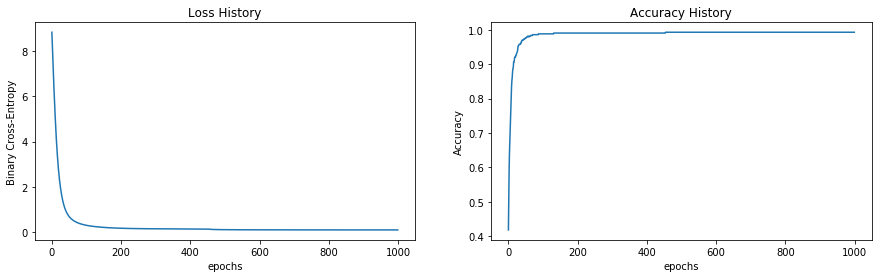

In [29]:
# using plt.subplot I can show paired loss and accuracy

plt.figure(figsize = (15, 4))  # adjust figures size
plt.subplots_adjust(wspace=0.2)  # adjust distance between plots

# loss plot
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy')

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

Accuracy scores reached .97+ levels after less than 200 epochs, which is good.

At this point, we can make a prediction on the test set, and check the Network's ability to generalize beyond the training set.

In [22]:
prediction = model.predict(X_test)    # (Keras syntax)

In [23]:
# outputs vector containing the value of the class with the highest predicted probability
prediction = np.argmax(prediction, axis=1)

# do it also for test data, i.e. reverse one-hot encoding and get a vector of 0-1 values
testdata = np.argmax(y_test, axis=1)


In [24]:
# Now I can plot the Confusion Matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(prediction, testdata)
print(CM)

[[87  1]
 [ 2 53]]


The Confusion Matrix looks very good: oservations on the matrix diagonal are correct predictions. Luckily, only three datapoints have been misclassified.

In [25]:
# Accuracy = sum of the diagonal / sum of the whole matrix

print('Test Accuracy: ' + str(np.sum(np.diag(CM)) / np.sum(CM)))

Test Accuracy: 0.9790209790209791


I like to visualize Confusion Matrices using a heatmap. IMHO, `seaborn` is the best Python library for that:

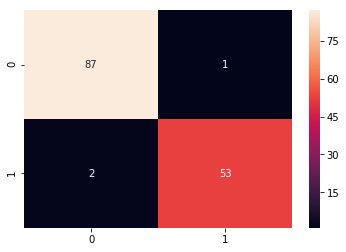

In [26]:
import seaborn

seaborn.heatmap(CM, annot=True)

## 5. Wrap the training process with a function

Working with Machine (and Deep) Learning requires testing a whole lot of models. Sometimes, writing a block of code for training each Neural Network you want to try might take too much time. For that reason, it becomes useful to define a "training function" with parameters you can tune that you can call whenever you need.

This is just a wrapper for the above code:

In [30]:
def train_model(model, train, target, loss, optimizer, metrics, n_epochs, verbose=True, plot=True):
    '''
    Trains a TensorFlow 2.0 model
    
    Returns:
        prediction: The model's prediction - numpy
        loss_history: list
        metrics_history: list
    
    Arguments:
        model: a Sequential() model
        train: Train dataset (numpy)
        target: Target dataset - True outcome (numpy)
        loss: loss object or function
        optimizer: optimizer object (learnin rate is specified within)
        metrics: an evaluation metrics of the model's goodness
        n_epochs: number of iterations of training
        verbose: print training progress yes/no
        plot = plot loss and accuracy histories at the end of training y/n
    '''
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    
    
    loss_history = []
    metrics_history = []
    
    for epoch in range(n_epochs):
    
        with tf.GradientTape() as tape:
            current_loss = loss(model(train), target)
        
        gradients = tape.gradient(current_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        loss_history.append(current_loss.numpy())
        metrics.update_state(target, model(train))
        current_metrics = metrics.result().numpy()
        metrics_history.append(current_metrics)
        
        if verbose:            
            if (epoch+1) % 100 == 0:
                print(str(epoch+1) 
                      + '.\tTraining Loss: ' + str(current_loss.numpy()) 
                      + ',\tAccuracy: ' + str(current_metrics))
    
        accuracy.reset_states()
    
    print('\nTraining complete.')
    
    if plot:
        plt.figure(figsize = (15, 4))
        plt.subplots_adjust(wspace=0.2)  # this distances the plots

        plt.subplot(1, 2, 1)
        plt.plot(loss_history)
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.subplot(1, 2, 2)
        plt.plot(metrics_history)
        plt.title('Metrics History')
        plt.xlabel('Epochs')
        plt.ylabel('Metrics')
        
        plt.show()
    
    return prediction, loss_history, metrics_history

This is a very bare training function that I could have called as follows:

    preds, loss_history, accuracy_history = train_model(model, X_train, y_train, 
                                                        loss = tf.keras.losses.BinaryCrossentropy(), 
                                                        optimizer = tf.optimizers.Adam(learning_rate=0.001), 
                                                        accuracy = tf.keras.metrics.BinaryAccuracy(), 
                                                        n_epochs = 1000)

With it, you can train this or a similar model with a single line of code. You can also update it with lots of fancier features.

Ok, this is all for now. Thanks for take the time to read my Notebook.

Call me crazy, but I think I'm going to miss the good ol' `tf.Session()` of TensorFlow 1.x. However, I must admit that once you've learned the TensorFlow 2.0 eager execution you'll be able to implement Deep Learning model much quicker that usual.